# Workshop 3: Ensemble Learning with SciKit-Learn and XGBoost

## Import Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading in the Data


In [0]:
# imports our data into Colab
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult.csv


In [0]:
df = pd.read_csv('/content/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Data Preprocessing 


*   Removing/imputing null/missing values
*   Label encoding
*  One-hot encoding
*  Basic feature engineering/feature extraction
* Splitting the data into training and testing sets



In [0]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

label_encoders = defaultdict()

lbl = LabelEncoder()
df['sex'] = lbl.fit_transform(df['sex'])

In [0]:
df.drop(['education'], axis=1, inplace=True)

In [0]:
one_hot_encode_cols = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']
df = pd.get_dummies(df, columns=one_hot_encode_cols)
df.head()

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,0,4356,40,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,0,4356,18,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,0,4356,40,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,0,3900,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,0,3900,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0


In [0]:
X = df.drop(['income'], axis=1)
y = df['income']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Ensemble Learning: Bagging 

### Conceptual Background

In any Machine Learning task, our main aim is to reduce the error. The idea is to train models on different dataset samples and reduce error. But the problem is we only have a single training set. The solution is we take a single learning algorithm and create variations of it. This solution is specifically called ensemble. When we combine these multiple independent and different models, the random errors cancel out each other and correct decisions are reinforced. 

1. The basic idea behind bagging is we take multiple bootstrap samples from the training set ie, we sample the dataset with replecement and all of them are of the same size as the dataset. 
2. We create different models using these samples.
3. Then these models are combined to classify a new instance. For classification task, the majority of class labels are considered. For regression task, we take the average. 

![Bagging](https://cdn-images-1.medium.com/max/1600/0*zrm9Q8twgrq8lfLk.)

**Strengths**
* Reduces variance in comparison to regular decision trees
* Can easily handle qualitative (categorical) features
* Out of bag (OOB) estimates can be used for model validation

**Weaknesses**
* Not as easy to visually interpret
* Does not reduce variance if the features are correlated

### Bagging Demo

In [0]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor

In [0]:
bagging = BaggingClassifier(n_estimators=100, n_jobs=4)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=4, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = bagging.predict(X_test)
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy score: 0.8561777049851571
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7429
        >50K       0.74      0.62      0.67      2340

   micro avg       0.86      0.86      0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



## Ensemble Learning: Random Forests


### Conceptual Background

Random Forest are special case of ensembles, specifically for Decision Trees (seen in previous workshop). In bagging, the only source of randomness was through samples. Here in addition to random sampling, we also sample the features. At each split of the decision tree, instead of considering all the features, we would examine only a random sample of attributes of fixed size. 

![Bagging vs Random Forest](https://i0.wp.com/www.petereliason.com/wp-content/uploads/2017/02/rf.png?resize=660%2C503)

A Random Forest is trained as follows where T is some number of trees:

> Sample N cases at random with replacement to create a subset of the data (see top layer of figure above). The subset should be about 66% of the total set.

>At each node:
>>For some number m, m predictor variables are selected at random from all the predictor variables.

>>The predictor variable that provides the best split, according to some objective function, is used to do a binary split on that node.

>>At the next node, choose another m variables at random from all predictor variables and do the same.

![Random Forest Simplified](https://cdn-images-1.medium.com/max/1600/1*8lI2kFCsMF8AzHT0OQnG1g.png)

**Strengths**:

*   Very fast
*   Able to deal with unbalanced and missing data

**Weaknesses**:

*   When used for regression, they cannot predict beyond the range in the training data
*   They may over-fit data sets that are particularly noisy

### Random Forest Demo

In [0]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [0]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=4)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
y_pred = rf.predict(X_test)
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy score: 0.8551540587572934
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7429
        >50K       0.74      0.61      0.67      2340

   micro avg       0.86      0.86      0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



## XGBoost: State of the Art Gradient Boosting Framework

* Creating a Dmatrix
* Training XGBoost models and testing them
* Scikit-learn API for XGBoost
* Plotting feature importances


### Conceptual Background

In bagging, different models were considered independent. It was a parallel process. But boosting is a sequential process. At each iteration, the model depends on the model from previous steps. Each sample is associated with weight. Initially, all the samples have equal weights and are re-assigned at the end of each iteration.  It is a gradual learning process where misclassified examples are assigned more weight and correctly classified ones are assigned less weight. Through this, we want to force the classifier to give more importance to the misclassified examples.

![Bagging vs Boosting](https://image.slidesharecdn.com/boostingalgorithmsomarodibatacmmeetupnov2017-171116035904/95/boosting-algorithms-omar-odibat-30-638.jpg?cb=1510804849)

Gradient boosting is a combination of Boosting and Gradient Descent. Here, the misclassified examples are not only identified by high weights but also by gradients. 

More information on Gradient Boosting:-
https://www.youtube.com/watch?v=ufHo8vbk6g4

**Strengths**
* Somewhat more interpretable than bagged trees/random forest as the user can define the size of each tree resulting in a collection of stumps (1 level) which can be viewed as an additive model
* Can easily handle qualitative (categorical) features

**Weaknesses**
* Unlike bagging and random forests, can overfit if number of trees is too large


### DMatrix with XGBoost

In [0]:
# income needs to be encoded since DMatrix doesn't work well with categorical labels
lbl = LabelEncoder()
y_train = lbl.fit_transform(y_train)

In [0]:
y_test = lbl.fit_transform(y_test)

In [0]:
import xgboost as xgb

# create a DMatrix for X_train and X_test
dm_train = xgb.DMatrix(data=X_train, label=y_train)
dm_test = xgb.DMatrix(data=X_test, label=y_test)

params = {'objective' : 'binary:logistic', 'silent': 1}
# watch_list=[(dm_test, 'eval'), (dm_train, 'train')]

# train the model using the training DMatrix
xg_model = xgb.train(params=params, dtrain=dm_train, num_boost_round=100)#, evals=watch_list)

[0]	eval-error:0.144744	train-error:0.143515
[1]	eval-error:0.14372	train-error:0.140795
[2]	eval-error:0.144539	train-error:0.141146
[3]	eval-error:0.142492	train-error:0.138206
[4]	eval-error:0.140649	train-error:0.136583
[5]	eval-error:0.140137	train-error:0.135223
[6]	eval-error:0.139932	train-error:0.132941
[7]	eval-error:0.137988	train-error:0.13281
[8]	eval-error:0.137271	train-error:0.131932
[9]	eval-error:0.137169	train-error:0.13123
[10]	eval-error:0.137271	train-error:0.130879
[11]	eval-error:0.136862	train-error:0.13066
[12]	eval-error:0.136145	train-error:0.128949
[13]	eval-error:0.136554	train-error:0.12851
[14]	eval-error:0.135121	train-error:0.128027
[15]	eval-error:0.135121	train-error:0.126799
[16]	eval-error:0.134712	train-error:0.126097
[17]	eval-error:0.132255	train-error:0.123815
[18]	eval-error:0.131231	train-error:0.123289
[19]	eval-error:0.130515	train-error:0.121622
[20]	eval-error:0.13072	train-error:0.120349
[21]	eval-error:0.128672	train-error:0.11991
[22]	

"\nxg_model = xgb.XGBClassifier(n_estimators=400, n_jobs=4, gamma=1)\nxg_model.fit(X_train, y_train)\n\ny_pred = xg_model.predict(X_test)\nprint('Accuracy score:', format(100*accuracy_score(y_test, y_pred)), '%')\nprint(classification_report(y_test, y_pred))\n\n# plot importance of top 20 features\nxgb.plot_importance(xg_model, max_num_features=20)\n"

In [0]:
y_pred = xg_model.predict(dm_test)
y_pred

array([1.7616196e-01, 3.1843429e-04, 6.0422164e-01, ..., 2.8830050e-03,
       2.3225224e-02, 1.1397157e-02], dtype=float32)

In [0]:
y_pred = [round(y) for y in y_pred]
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8706111167980346
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7429
           1       0.78      0.64      0.70      2340

   micro avg       0.87      0.87      0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



### Scikit-learn XGBoost API

Accuracy score: 87.47057017094892 %
              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      7429
        >50K       0.80      0.63      0.71      2340

   micro avg       0.87      0.87      0.87      9769
   macro avg       0.85      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



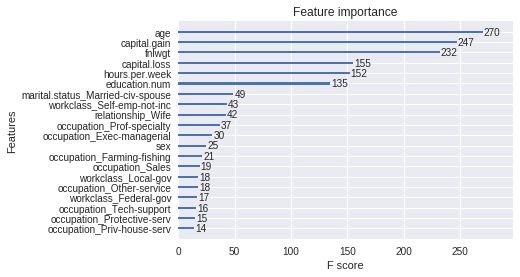

In [0]:
# scikit-learn api
xg_model = xgb.XGBClassifier(n_estimators=400, n_jobs=4, gamma=1)
xg_model.fit(X_train, y_train)

y_pred = xg_model.predict(X_test)
y_pred = [round(y) for y in y_pred]
print('Accuracy score: {}', format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# plot importance of top 20 features
xgb.plot_importance(xg_model, max_num_features=20)